In [1]:
# 로지스틱 모델 train
import numpy as np
import matplotlib.pylab as plt

# 데이터 로드
from sklearn import datasets

# 로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression

# iris 붓꽃
iris = datasets.load_iris()
list_iris = []

# dict_keys 무엇인지 설명 해주기 
list_iris = iris.keys()

print(list_iris)

x = iris["data"][:,3:] # 꽃잎의 너비 변수만 사용 
y = (iris["target"] == 2 ).astype("int") # ris-Versinica면 1, 아니면 0

print("iris 꽃잎의 너비 \n", x)
print(y)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris 꽃잎의 너비 
 [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.

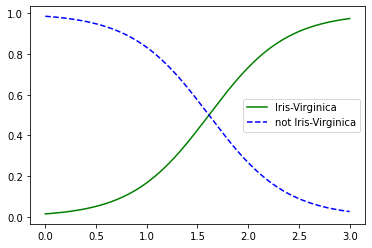

In [2]:
# 찾아서 정리해서 알려주기 
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x,y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# 이제 꽃잎이 너비가 0 ~ 3 cm 인 꽃에 대해 모델의 추정확률을 계산
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(x_new, y_proba[:,0], "b--", label = "not Iris-Virginica")
plt.legend()
plt.show()

/Users/robot/.pyenv/versions/dp/lib/python3.7/site-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


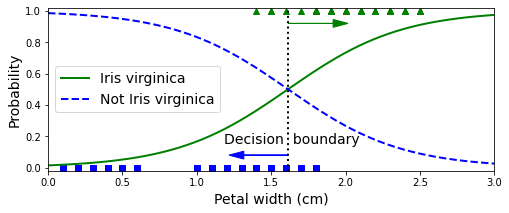

In [3]:
# 좀더 보기 좋게 변경해봅시다
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0] # 0.5 인 이상인 경우 

plt.figure(figsize=(8, 3)) # 그래프 사이즈 
plt.plot(x[y==0], y[y==0], "bs")  # 음성범주 pointing
plt.plot(x[y==1], y[y==1], "g^")  # 양성범주 pointing

# 결정경계 표시 
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

# 추정확률 plotting
plt.plot(x_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(x_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [4]:
# 해석
# 그래프를 보면 Iris virginica (y=1)는 꽃잎의 너비 1.4 ~ 2.5 cm 사이에 분포 (초록색 삼각형)한다.
# Iris virginica is not 일반적인 꽃잎의 너비가 더 작아 1.8 cm 보다 작게 분포한다 . 그래서 약간 중첩되는 구간 존재합니다.

# 그러면 결정경계 가 어떤 값을 가지고 분류하는가 ? 
print("decision_boundary = " , decision_boundary)

# 양쪽의 확률이 50%가 되는 1.6cm 근방에서 결정경계(decision boundary)가 만들어지고 분류기는 1.6cm 보다 크면 Iris virginica 분류하고 
# 작으면 아니라고 예측 할 겁니다.

# 그러면 진짜 그렇게 예측을 했는지 확인해보자 
test_code = log_reg.predict([[1.8] , [1.48]])
print(f"진짜 우리가 원하는 분류가 되는가 확인 test code, 분류기준{decision_boundary} result = " , test_code)

decision_boundary =  [1.61561562]
진짜 우리가 원하는 분류가 되는가 확인 test code, 분류기준[1.61561562] result =  [1 0]


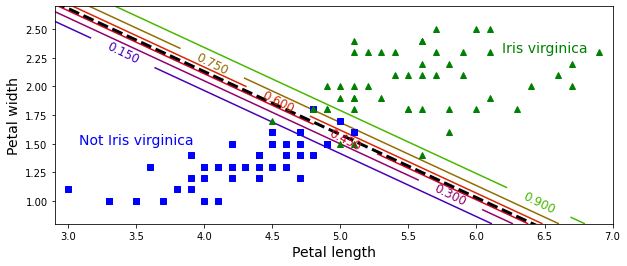

decision_boundary =  [2.7361817  0.47773807]


In [10]:
# 꽃잎 너비와 꽃잎 길이 2개의 변수를 이용해서 훈련 실습
x = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# 사이킷런의 LogisticRegression모델의 규제강도를 조절하는 하이퍼파라미터는 alpha가 아니라 그 역수에 해당하는 C이다.
# C가 높을수록 모델의 규제가 줄어든다.

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(x,y)


# 2차원 그리드 포인트 생성 
# 변수 가 2개인 2차원 함수의 그래프를 그리거나 표로 작성하려면 2차원 영역에 대한(x,y) 좌표값 쌍 즉 그리드 포인트를 생성하여
# 각 좌표에 대한 함수 값을 계산한다.
# 이러한 그리드 포인트를 만드는 과정을 도와주는 것이 meshgird 명령어 입니다.
# meshgrid 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 백터를 인수로 받아서 사각형 영역을 이루는 조합을 출력
# 결과는 그리드 포인트 x값만을 표시 하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.

x1, x2 = np.meshgrid(
    np.linspace(2.9 , 7 , 500).reshape(-1, 1),
    np.linspace(0.8 , 2.7 , 200).reshape(-1,1),
)

x_new = np.c_[x1.ravel() , x2.ravel()]
y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs")
plt.plot(x[y==1, 0], x[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x1.shape)
contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [ ]:
# 그래프 해석
# 위 그래프의 점선은 모델이 50% 확률을 추정하는 지점으로 , 이 모델의 결정경계 입니다.
# 이 경계는 θ0 + θ1x1 + θ2x2 = 0 만족하는. (x1, x2) 의 집합으로 선형경계 입니다.
# 이 (x1, x2)조합에 따라 lris-Verginica에 속할 확률은 15 ~ 90% 까지 나타내고 있습니다.